# Dogs vs Cats
## Kaggle Dataset의 일부를 이용한 개, 고양이 구분
## Train set = 0-9999, Test set = 10000-12499
### 출처: [pontoregende GitHub](https://github.com/pontorezende/Dogs-vs-Cats-Redux-with-CNN)

#### https://www.kaggle.com/sarvajna/dogs-vs-cats-keras-solution

In [1]:
import numpy as np
from glob import glob
import cv2, os, random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import re

In [3]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
path='dogs-vs-cats/train/'

## Train Set 만들기

In [5]:
## used for resize and in our model
ROW, COL = 96, 96

dogs, cats = [], []
y_dogs, y_cats = [], []

In [6]:
train_images_dogs_cats = [path+i for i in os.listdir(path)]
test_images_dogs_cats = [path+i for i in os.listdir(path)]

In [8]:
cat_path = train_images_dogs_cats[0:9999] 
dog_path = train_images_dogs_cats[12500:22499] 

In [9]:
dog_path

['dogs-vs-cats/train/dog.0.jpg',
 'dogs-vs-cats/train/dog.1.jpg',
 'dogs-vs-cats/train/dog.10.jpg',
 'dogs-vs-cats/train/dog.100.jpg',
 'dogs-vs-cats/train/dog.1000.jpg',
 'dogs-vs-cats/train/dog.10000.jpg',
 'dogs-vs-cats/train/dog.10001.jpg',
 'dogs-vs-cats/train/dog.10002.jpg',
 'dogs-vs-cats/train/dog.10003.jpg',
 'dogs-vs-cats/train/dog.10004.jpg',
 'dogs-vs-cats/train/dog.10005.jpg',
 'dogs-vs-cats/train/dog.10006.jpg',
 'dogs-vs-cats/train/dog.10007.jpg',
 'dogs-vs-cats/train/dog.10008.jpg',
 'dogs-vs-cats/train/dog.10009.jpg',
 'dogs-vs-cats/train/dog.1001.jpg',
 'dogs-vs-cats/train/dog.10010.jpg',
 'dogs-vs-cats/train/dog.10011.jpg',
 'dogs-vs-cats/train/dog.10012.jpg',
 'dogs-vs-cats/train/dog.10013.jpg',
 'dogs-vs-cats/train/dog.10014.jpg',
 'dogs-vs-cats/train/dog.10015.jpg',
 'dogs-vs-cats/train/dog.10016.jpg',
 'dogs-vs-cats/train/dog.10017.jpg',
 'dogs-vs-cats/train/dog.10018.jpg',
 'dogs-vs-cats/train/dog.10019.jpg',
 'dogs-vs-cats/train/dog.1002.jpg',
 'dogs-vs-cats/tr

In [10]:
# ## Load some our dog images (10000 개 이미지)

for dog_img in dog_path:
    dog = cv2.imread(dog_img) # 이미지를 읽고
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY) # BGR2GRAY로 가져옴
    dog = cv2.resize(dog, (ROW, COL)) # 96x96으로 사이즈변경
    dog = image.img_to_array(dog)
    dogs.append(dog)

In [11]:
# ## Load some our cat images (10000 개 이미지)

for cat_img in cat_path:
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)

In [12]:
classes = ['dog', 'cat']

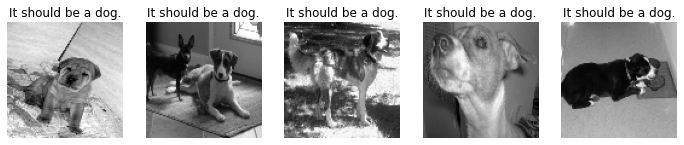

In [13]:
# 제대로 들어갔는지 확인
# conda install pillow

plt.figure(figsize=(12,8))    
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(dogs))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[0]))        
plt.show()

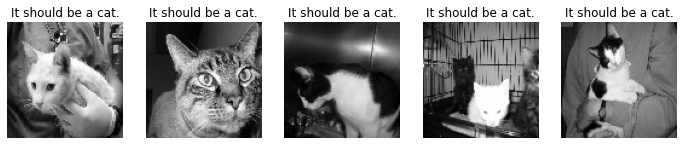

In [14]:
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(cats))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[1]))
plt.show()

In [15]:
## just change the labels for 0 and  1
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [16]:
y_dogs[:5], y_cats[:5]

([1, 1, 1, 1, 1], [0, 0, 0, 0, 0])

In [17]:
## converting everything to Numpy array to fit in our model
## them creating a X and target file like we used to see
## in Machine and Deep Learning models

# 0에서 1까지의 값으로 바꿈
dogs = np.asarray(dogs).astype('float32') / 255
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [18]:
X_train = np.concatenate((dogs, cats), axis=0)
y_train = np.concatenate((y_dogs, y_cats), axis=0)

In [19]:
len(X_train)

19998

In [20]:
## One-Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train, 2)

## test set 만들기

In [21]:
dogs, cats = [], []
y_dogs, y_cats = [], []

In [22]:
cat_path = train_images_dogs_cats[10000:12499] 
dog_path = train_images_dogs_cats[22450:24949]

In [23]:
## Load some our cat images (2500 개 이미지)

for dog_img in dog_path:
    dog = cv2.imread(dog_img) # 이미지를 읽고
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY) # BGR2GRAY로 가져옴
    dog = cv2.resize(dog, (ROW, COL)) # 96x96으로 사이즈변경
    dog = image.img_to_array(dog)
    dogs.append(dog)

In [24]:
## Load some our cat images (2500 개 이미지)

for cat_img in cat_path:
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)

In [25]:
## just change the labels for 0 and  1
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [26]:
## converting everything to Numpy array to fit in our model
## them creating a X and target file like we used to see
## in Machine and Deep Learning models

# 0에서 1까지의 값으로 바꿈
dogs = np.asarray(dogs).astype('float32') / 255
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [27]:
dogs.shape

(2499, 96, 96, 1)

In [28]:
X_test = np.concatenate((dogs, cats), axis=0)
y_test = np.concatenate((y_dogs, y_cats), axis=0)

In [29]:
len(X_test)

4998

In [30]:
## One-Hot Encoding
y_test = tf.keras.utils.to_categorical(y_test, 2)

### 모델설정

In [31]:
## Here is our model as a CNN
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(ROW, COL, 1),
           activation='relu'), # 32를 3x3로, 패딩이 same이므로 결과가 똑같게, (96,96,1)
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),# 48x48이 됨
    Dropout(.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)), # 24x24이 됨
    Dropout(.25),
    Flatten(), # 다곱함
    Dense(512, activation='relu'),
    Dropout(.5),
    Dense(2, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0

In [32]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(), metrics=['accuracy'])
# from tensorflow.keras.optimizers import Adam 하면 optimizer=Adam()로 가능!

In [33]:
## to save checkpoint to use later
modelpath = "model/dogs_vs_cats-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

### 모델 학습

In [34]:
X_train.shape

(19998, 96, 96, 1)

In [35]:
y_train.shape

(19998, 2)

In [36]:
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2,
          callbacks=[checkpointer, early_stopping_callback])

Train on 15998 samples, validate on 4000 samples
Epoch 1/10
15968/15998 [============================>.] - ETA: 0s - loss: 0.6494 - accuracy: 0.6344
Epoch 00001: val_loss improved from inf to 0.94376, saving model to model/dogs_vs_cats-cnn-01-0.9438.hdf5
15998/15998 [==============================] - 240s 15ms/sample - loss: 0.6495 - accuracy: 0.6343 - val_loss: 0.9438 - val_accuracy: 0.2592
Epoch 2/10
15968/15998 [============================>.] - ETA: 0s - loss: 0.5501 - accuracy: 0.7147
Epoch 00002: val_loss improved from 0.94376 to 0.76432, saving model to model/dogs_vs_cats-cnn-02-0.7643.hdf5
15998/15998 [==============================] - 237s 15ms/sample - loss: 0.5502 - accuracy: 0.7147 - val_loss: 0.7643 - val_accuracy: 0.5710
Epoch 3/10
15968/15998 [============================>.] - ETA: 0s - loss: 0.4927 - accuracy: 0.7641
Epoch 00003: val_loss improved from 0.76432 to 0.59399, saving model to model/dogs_vs_cats-cnn-03-0.5940.hdf5
15998/15998 [==============================] 

In [37]:
from tensorflow.keras.models import load_model
del model
model = load_model('model/dogs_vs_cats-cnn-06-0.5077.hdf5')

In [38]:
scores = model.evaluate(X_test, y_test, verbose=2)
print('MODEL ACCURACY: %.5f' % scores[1])

4998/4998 - 14s - loss: 0.4118 - accuracy: 0.8109
MODEL ACCURACY: 0.81092
